# WeatherPy

In [1]:
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import mplcursors
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [20]:

        # Save config information.
        url = "http://api.openweathermap.org/data/2.5/weather?"
        units = "metric"

        # Build partial query URL
        query_url = f"{url}appid={weather_api_key}&units={units}&q="

        # set up lists to hold reponse info
        location = []
        lat = []
        lng = []
        temp = []
        humidity = []
        cloudiness = []
        wind_speed = []
        country = []
        date = []

        count=1
        # Loop through the list of cities and perform a request for data on each
        for city in cities:
            try:
                response = requests.get(query_url + city).json()
                location.append(response['name'])
                lat.append(response['coord']['lat'])
                lng.append(response['coord']['lon'])
                temp.append(response['main']['temp_max'])
                humidity.append(response['main']['humidity'])
                cloudiness.append(response['clouds']['all'])
                wind_speed.append(response['wind']['speed'])
                country.append(response['sys']['country'])
                date.append(response['dt'])
                print(f"{count} {response['name']}: Success")
                count += 1

            except KeyError:
                print("City Not Found.")
                
print(f"--"*100)
print(f"Total Cities with Weather Data: {count}")
print(f"--"*100)

1 Megion: Success
2 Ilulissat: Success
3 Ushuaia: Success
4 Cape Town: Success
5 Namie: Success
6 Zhigansk: Success
7 Warrnambool: Success
8 Arraial do Cabo: Success
9 Kapaa: Success
10 Hermanus: Success
11 Avera: Success
12 Albany: Success
13 Rikitea: Success
14 Katghora: Success
15 Kendari: Success
City Not Found.
16 Gizo Government Station: Success
17 Tegul'det: Success
18 Yulara: Success
19 Yar-Sale: Success
20 Qaanaaq: Success
21 Severo-Kuril'sk: Success
22 Mount Isa: Success
23 Henties Bay: Success
24 Andenes: Success
25 Lüderitz: Success
26 Torbay: Success
27 Cabo San Lucas: Success
28 Tuktoyaktuk: Success
29 Atuona: Success
30 Hofn: Success
City Not Found.
31 Raudeberg: Success
32 Namatanai: Success
33 Port Victoria: Success
34 College: Success
35 Hong Kong: Success
36 Punta Arenas: Success
37 Saint-Philippe: Success
38 Sarh: Success
39 Arrondissement de Bressuire: Success
City Not Found.
City Not Found.
40 Bredasdorp: Success
41 Butaritari: Success
42 Ostrovnoy: Success
43 Cho

City Not Found.
351 Itarema: Success
352 Boulder City: Success
353 Salto: Success
354 Ust'-Ishim: Success
355 Platteville: Success
City Not Found.
356 Vila Franca do Campo: Success
357 Khovd: Success
358 Kalabo: Success
359 Kharan: Success
City Not Found.
360 Omsukchan: Success
361 Boone: Success
362 Lourdes: Success
City Not Found.
363 Danilov: Success
364 Samarai: Success
365 La Ronge: Success
366 Vysokogornyy: Success
367 Verkhoyansk: Success
368 Caucayá: Success
369 Biak: Success
370 Corbélia: Success
371 Cedar City: Success
372 Nogliki: Success
373 Aksarka: Success
374 Bandrele: Success
375 Zavallya: Success
376 Kysyl-Syr: Success
377 Airai: Success
378 Chui: Success
379 Umabay: Success
380 Ust'-Barguzin: Success
381 Mogadishu: Success
382 Cabedelo: Success
383 Havre-St-Pierre: Success
384 Byron Bay: Success
385 Sarangani: Success
386 Benguela: Success
387 Tuatapere: Success
388 Lewistown: Success
389 Quryq: Success
390 Bairiki Village: Success
391 Tessalit: Success
392 Victoria P

### Convert Raw Data to DataFrame and Export CSV

In [21]:
# create a dictionary
weather_dict = {
        "Name":location,
        "Lat":lat,
        "Lng":lng,
        "Max_Temp":temp,
        "Humidity":humidity,
        "Cloudiness":cloudiness,
        "Wind_Speed":wind_speed,
        "Country":country,
        "Date": date
}

# convert dictionary to dataframe
weather_data = pd.DataFrame(weather_dict)

# convert unix date to standard formatting
weather_data['Date'] = pd.to_datetime(weather_data['Date'], unit='s', origin='unix')
weather_data.head()

,Name,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Megion,61.0296,76.1136,17.01,72,12,2.69,RU,2021-08-25 20:55:20
1,Ilulissat,69.2167,-51.1000,7.01,81,75,3.60,GL,2021-08-25 20:49:31
2,Ushuaia,-54.8000,-68.3000,4.79,52,0,1.54,AR,2021-08-25 20:44:50
3,Cape Town,-33.9258,18.4232,13.40,88,75,5.14,ZA,2021-08-25 20:49:31
4,Namie,37.4833,141.0000,25.95,93,84,2.14,JP,2021-08-25 20:55:21


In [22]:
# output dataframe to csv file
output_path = "./city_weather_data.csv"
weather_data.to_csv(output_path, index=False, header=True)

In [23]:
weather_data.Humidity.describe()

count    577.000000
mean      70.348354
std       21.581040
min        8.000000
25%       59.000000
50%       76.000000
75%       87.000000
max      100.000000
Name: Humidity, dtype: float64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

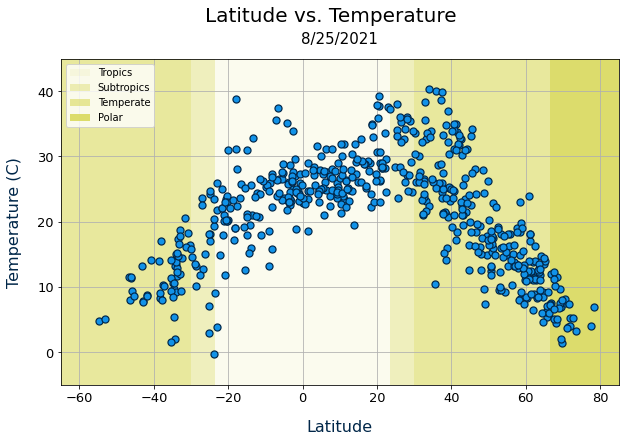

In [24]:
plt.figure(figsize=(10,6))
plt.grid()
plt.title("8/25/2021", fontsize=15, pad=15)
plt.suptitle("Latitude vs. Temperature", fontsize=20, y=1)
plt.xlabel("Latitude", fontsize=16, labelpad=15, color="#012749")
plt.ylabel("Temperature (C)", fontsize=16, labelpad=15, color="#012749")
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylim(-5, 45)
plt.xlim(-65, 85)
plt.axvspan(-23.5, 23.5, facecolor='#D9D95C', alpha=0.1, label='Tropics')
plt.axvspan(-30, -23.5, facecolor='#D9D95C', alpha=0.4, label='Subtropics')
plt.axvspan(23.5, 30, facecolor='#D9D95C', alpha=0.4)
plt.axvspan(-65, -30, facecolor='#D9D95C', alpha=0.6, label='Temperate')
plt.axvspan(30, 66.5, facecolor='#D9D95C', alpha=0.6)
plt.axvspan(66.5, 85, facecolor='#D9D95C', alpha=0.9, label='Polar')
plt.legend()
plt.scatter(weather_data['Lat'],weather_data['Max_Temp'] , facecolor='#1192e8', s=50, alpha=1, edgecolor='#012749', linewidth=1.2, zorder=7)
plt.savefig('lat_v_temp', facecolor = 'white', bbox_inches='tight', pad_inches=.3)

## Latitude vs. Humidity Plot

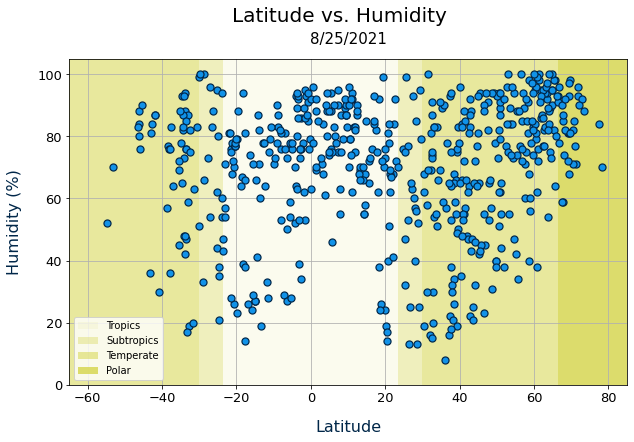

In [25]:
plt.figure(figsize=(10,6))
plt.grid()
plt.title("8/25/2021", fontsize=15, pad=15)
plt.suptitle("Latitude vs. Humidity", fontsize=20, y=1)
plt.xlabel("Latitude", fontsize=16, labelpad=15, color="#012749")
plt.ylabel("Humidity (%)", fontsize=16, labelpad=15, color="#012749")
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylim(0, 105)
plt.xlim(-65, 85)
plt.axvspan(-23.5, 23.5, facecolor='#D9D95C', alpha=0.1, label='Tropics')
plt.axvspan(-30, -23.5, facecolor='#D9D95C', alpha=0.4, label='Subtropics')
plt.axvspan(23.5, 30, facecolor='#D9D95C', alpha=0.4)
plt.axvspan(-65, -30, facecolor='#D9D95C', alpha=0.6, label='Temperate')
plt.axvspan(30, 66.5, facecolor='#D9D95C', alpha=0.6)
plt.axvspan(66.5, 85, facecolor='#D9D95C', alpha=0.9, label='Polar')
plt.legend()
plt.scatter(weather_data['Lat'],weather_data['Humidity'] , facecolor='#1192e8', s=50, alpha=1, edgecolor='#012749', linewidth=1.2, zorder=7)
plt.savefig('lat_v_humidity', facecolor = 'white', bbox_inches='tight', pad_inches=.3)

## Latitude vs. Cloudiness Plot

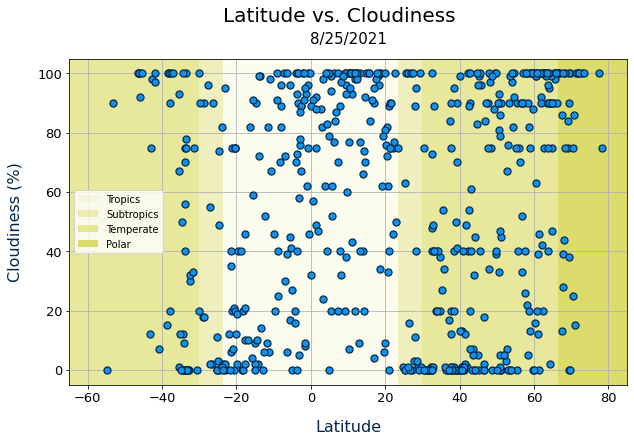

In [26]:
plt.figure(figsize=(10,6))
plt.grid()
plt.title("8/25/2021", fontsize=15, pad=15)
plt.suptitle("Latitude vs. Cloudiness", fontsize=20, y=1)
plt.xlabel("Latitude", fontsize=16, labelpad=15, color="#012749")
plt.ylabel("Cloudiness (%)", fontsize=16, labelpad=15, color="#012749")
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylim(-5, 105)
plt.xlim(-65, 85)
plt.axvspan(-23.5, 23.5, facecolor='#D9D95C', alpha=0.1, label='Tropics')
plt.axvspan(-30, -23.5, facecolor='#D9D95C', alpha=0.4, label='Subtropics')
plt.axvspan(23.5, 30, facecolor='#D9D95C', alpha=0.4)
plt.axvspan(-65, -30, facecolor='#D9D95C', alpha=0.6, label='Temperate')
plt.axvspan(30, 66.5, facecolor='#D9D95C', alpha=0.6)
plt.axvspan(66.5, 85, facecolor='#D9D95C', alpha=0.9, label='Polar')
plt.legend()
plt.scatter(weather_data['Lat'],weather_data['Cloudiness'] , facecolor='#1192e8', s=50, alpha=1, edgecolor='#012749', linewidth=1.2, zorder=7)
plt.savefig('lat_v_cloudiness', facecolor = 'white', bbox_inches='tight', pad_inches=.3)

## Latitude vs. Wind Speed Plot

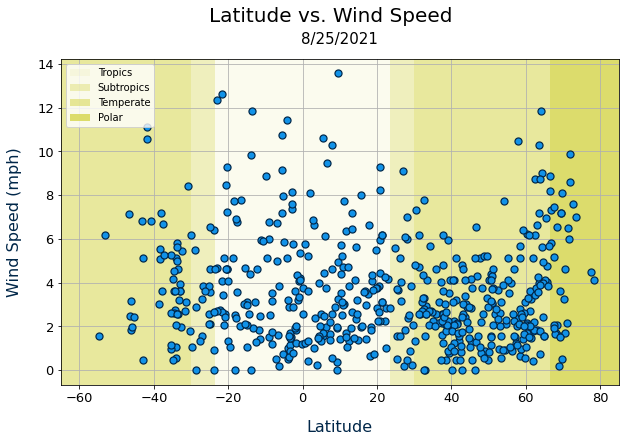

In [27]:
plt.figure(figsize=(10,6))
plt.grid()
plt.title("8/25/2021", fontsize=15, pad=15)
plt.suptitle("Latitude vs. Wind Speed", fontsize=20, y=1)
plt.xlabel("Latitude", fontsize=16, labelpad=15, color="#012749")
plt.ylabel("Wind Speed (mph)", fontsize=16, labelpad=15, color="#012749")
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlim(-65, 85)
plt.axvspan(-23.5, 23.5, facecolor='#D9D95C', alpha=0.1, label='Tropics')
plt.axvspan(-30, -23.5, facecolor='#D9D95C', alpha=0.4, label='Subtropics')
plt.axvspan(23.5, 30, facecolor='#D9D95C', alpha=0.4)
plt.axvspan(-65, -30, facecolor='#D9D95C', alpha=0.6, label='Temperate')
plt.axvspan(30, 66.5, facecolor='#D9D95C', alpha=0.6)
plt.axvspan(66.5, 85, facecolor='#D9D95C', alpha=0.9, label='Polar')
plt.legend(loc='best').set_zorder(8)
plt.scatter(weather_data['Lat'],weather_data['Wind_Speed'] , facecolor='#1192e8', s=50, alpha=1, edgecolor='#012749', linewidth=1.2, zorder=7)
plt.savefig('lat_v_windspeed', facecolor = 'white', bbox_inches='tight', pad_inches=.3)

## Linear Regression

In [28]:
# Create new dataframes for northern and southern latitudes
north_df = weather_data[(weather_data.Lat > 0)]
north_df.reset_index()
south_df = weather_data[(weather_data.Lat < 0)]
south_df.reset_index()

,index,Name,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,2,Ushuaia,-54.8000,-68.3000,4.79,52,0,1.54,AR,2021-08-25 20:44:50
1,3,Cape Town,-33.9258,18.4232,13.40,88,75,5.14,ZA,2021-08-25 20:49:31
2,6,Warrnambool,-38.3833,142.4833,8.23,77,100,5.53,AU,2021-08-25 20:55:22
3,7,Arraial do Cabo,-22.9661,-42.0278,25.92,57,0,12.35,BR,2021-08-25 20:53:16
4,9,Hermanus,-34.4187,19.2345,13.28,82,0,2.75,ZA,2021-08-25 20:54:12
...,...,...,...,...,...,...,...,...,...,...
175,553,Te Anau,-45.4167,167.7167,8.57,90,100,2.42,NZ,2021-08-25 20:53:52
176,565,Indramayu,-6.3264,108.3200,24.38,73,39,3.82,ID,2021-08-25 20:53:57
177,568,Voh,-20.9667,164.7000,22.95,72,7,2.43,NC,2021-08-25 20:53:59
178,573,Neiafu,-18.6500,-173.9833,23.38,64,40,5.14,TO,2021-08-25 20:54:01


In [29]:
# Create variable for latitudes
north_lat = north_df['Lat']
south_lat = south_df['Lat']

# Create variable for northern metrics
north_max_temp = north_df['Max_Temp']
north_humidity = north_df['Humidity']
north_cloudiness = north_df['Cloudiness']
north_wind = north_df['Wind_Speed']

# Create variable for southern metrics
south_max_temp = south_df['Max_Temp']
south_humidity = south_df['Humidity']
south_cloudiness = south_df['Cloudiness']
south_wind = south_df['Wind_Speed']

# Define function to plot regresssions
def regression_model(hemisphere, parameter, title, lat, loc=0.1):
    plt.figure(figsize=(10,6))
    plt.title(f"{hemisphere} HEMISPHERE | 8/25/2021", fontsize=13, pad=15)
    plt.suptitle(f"Linear Regression: {title} vs. Latitude", fontsize=17, y=1)
    plt.xlabel("Latitude", fontsize=13, labelpad=15, color="#012749")
    plt.ylabel(title, fontsize=13, labelpad=15, color="#012749")
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    (nh1_slope, nh1_int, nh1_r, nh1_p, nh1_std_err) = linregress(lat, parameter)
    nh1_val = nh1_slope * lat + nh1_int
    nh1_equation = f'y = {nh1_slope:.2f}x + {nh1_int:.2f}'
    plt.scatter(lat, parameter, facecolor='#1192e8', s=50, alpha=1, edgecolor='#012749', linewidth=1.2)
    plt.plot(lat,nh1_val,"r-")
    textstr=(f"{nh1_equation}\nR-Squared: {(nh1_r**2)}")
    plt.annotate(textstr, xy=(0.05, loc), xycoords='axes fraction',  fontsize = 10, color='#012749',
    bbox={'facecolor':'#D9D95C', 'alpha':0.4, 'pad':5})
    plt.savefig(f'{hemisphere}_lat_v_{title}.png', facecolor = 'white', bbox_inches='tight', pad_inches=.3)
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

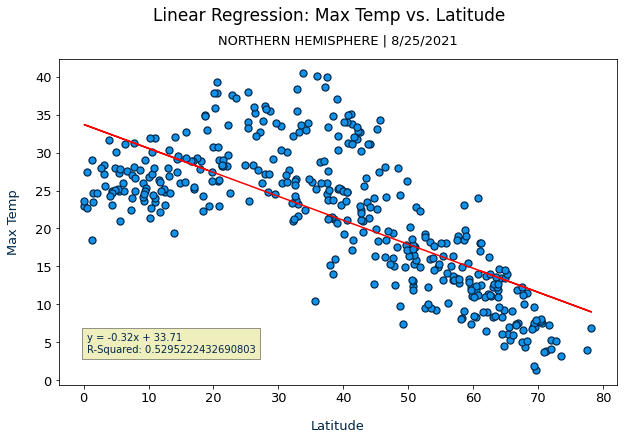

In [30]:
regression_model("NORTHERN", north_max_temp, "Max Temp", north_lat)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

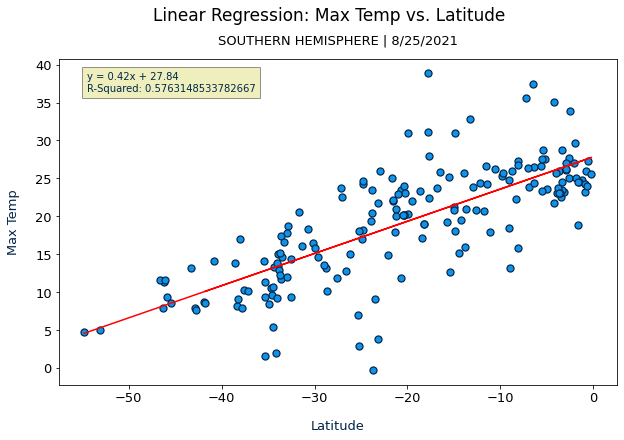

In [31]:
regression_model("SOUTHERN", south_max_temp, "Max Temp", south_lat, .9)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

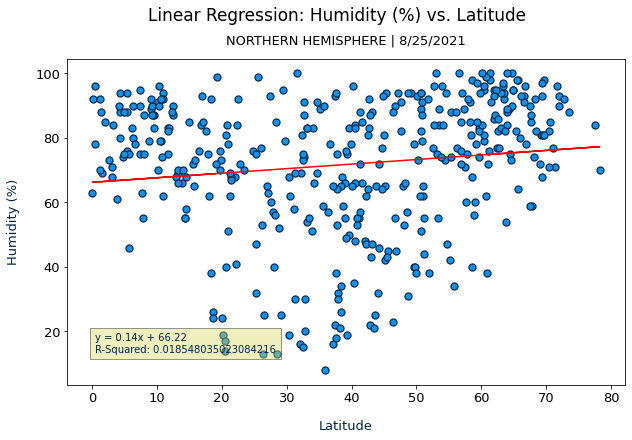

In [32]:
regression_model("NORTHERN", north_humidity, "Humidity (%)", north_lat)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

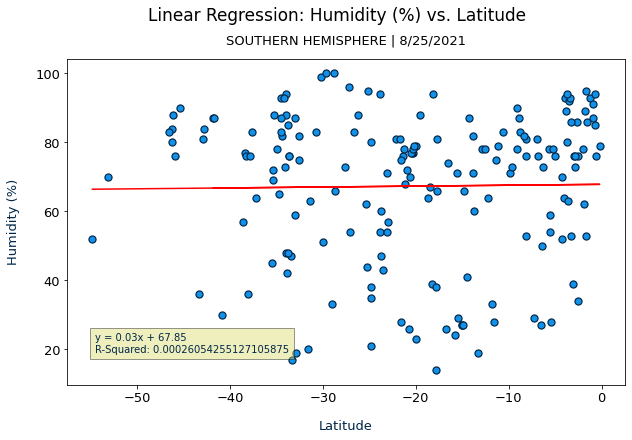

In [33]:
regression_model("SOUTHERN", south_humidity, "Humidity (%)", south_lat)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

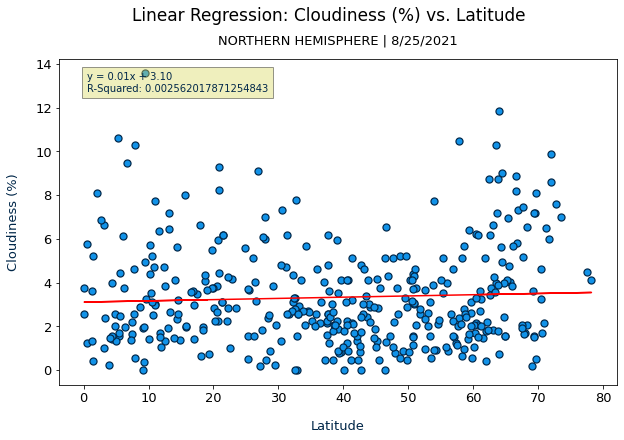

In [34]:
regression_model("NORTHERN", north_wind, "Cloudiness (%)", north_lat, .9)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

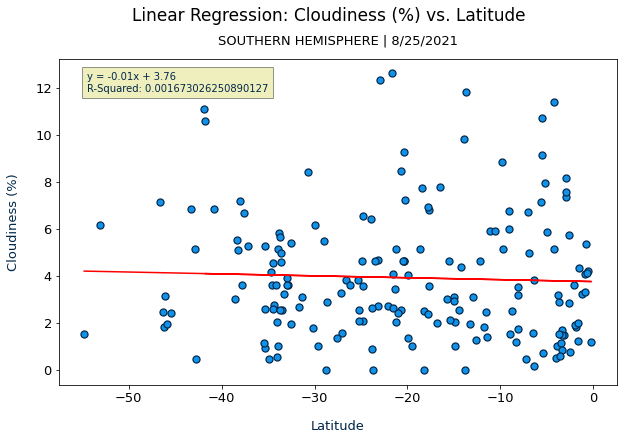

In [35]:
regression_model("SOUTHERN", south_wind, "Cloudiness (%)", south_lat, .9)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

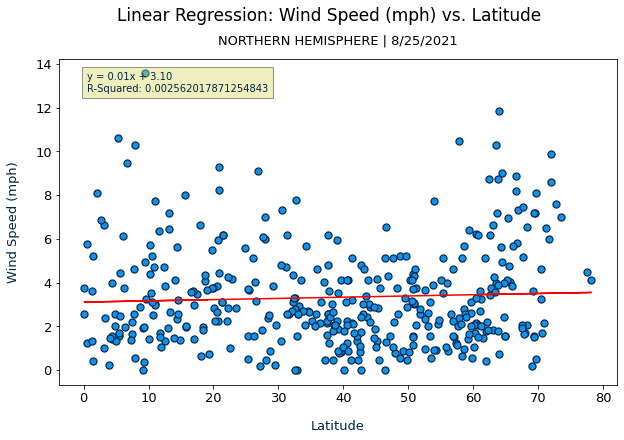

In [36]:
regression_model("NORTHERN", north_wind, "Wind Speed (mph)", north_lat, .9)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

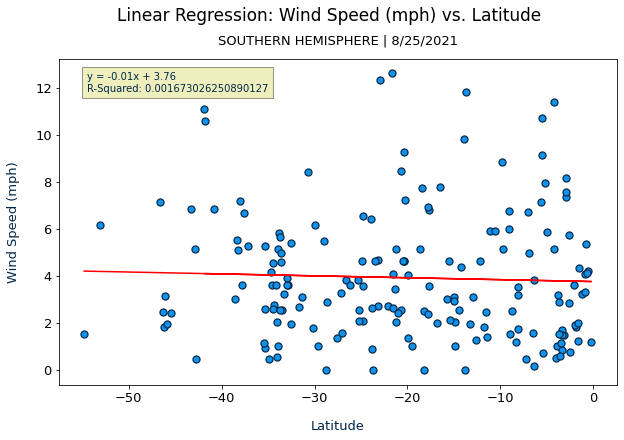

In [37]:
regression_model("SOUTHERN", south_wind, "Wind Speed (mph)", south_lat, .9)